<a href="https://colab.research.google.com/github/oceam/agri-image/blob/main/codes/Googlecolab_fundamentals_3_jp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Googlecolab_fundamentals_3  
Wei Guo  
2022.08.26

**Read and Display**
Read an image into the memory, using the imread command. The example reads one of the most widely used standard test images in image processing, an image of a young girl in a file named lena_std.tif, and stores it in an array named I .  Read the story of [Lena here](http://www.lenna.org/).   
imreadコマンドを使用して、画像をメモリーに読み込みます。この例では、画像処理で最も広く使われている標準的なテスト画像の1つである、 lena_std.tifを読み込み、I という配列に格納しています。 Lenaの[ストーリーはこちら](http://www.lenna.org/)。



As we learnt from last lecture, we need to import some needed libraries first.  
前回の講義で学んだように、まず必要なライブラリをインポートする必要があります。

In [1]:
import numpy as np
import pandas as pd
import cv2 
from google.colab.patches import cv2_imshow # for image display
from skimage import io
from PIL import Image 
import matplotlib.pylab as plt

Now read images, and display them using openCV, please note the difference when reading image in RGB and BGR format. The default input color channels are in BGR format for openCV.  
openCVを使って画像を読み込んで表示するわけですが，RGB形式とBGR形式で画像を読み込む場合の違いに注意してください．openCVのデフォルトの入力カラーチャンネルはBGR形式です．

In [2]:
# Create a list to store the urls of the images
# Need to upload the image first
I_cv = cv2.imread('lena_std.tif')  #BGR
cv2_imshow(I_cv)
print('\n')


AttributeError: ignored

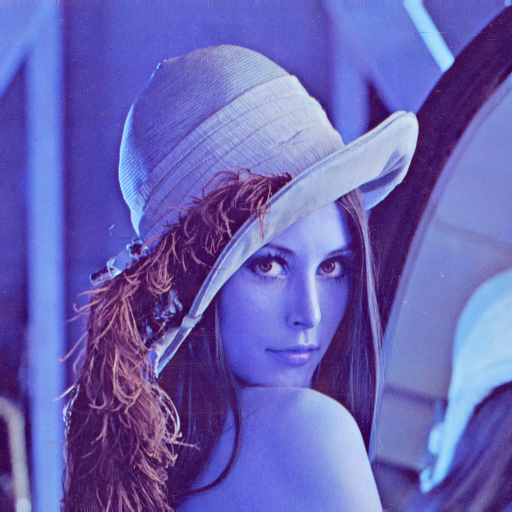

In [3]:
# or read from url directly
url = "http://www.lenna.org/lena_std.tif"
I = io.imread(url) #RGB
cv2_imshow(I)
print('\n')

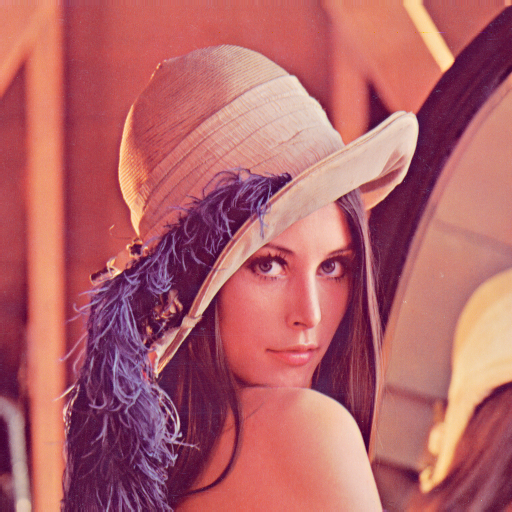

In [4]:
I_cv = cv2.cvtColor(I, cv2.COLOR_RGB2BGR)
cv2_imshow(I_cv)
print('\n')

Or can use io.imshow(I)

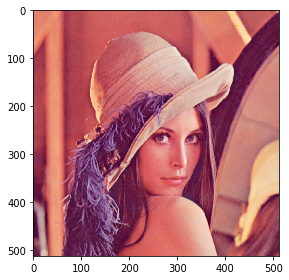

In [5]:
io.imshow(I)

get the size of I and store it.  
Also check Variable inspector.  
Iのサイズを取得し、それを格納する.  
変数インスペクタも確認.

In [6]:
s = I_cv.shape
print(s)
print(I_cv.dtype)

(512, 512, 3)
uint8


Did the size of the array match the size of the image in pixels? Yes. You probably noticed that there was an additional value returned by the size function: 3.
That's because the imported image is a color image, and so it needs a third dimension to store the red, green, and blue color planes.
You can access individual color planes of an image by indexing into the third dimension. For example, you can extract the green (second) color plane using the value 2 as the third index.
note the difference with toher language such as Matlab.  
配列のサイズと画像のサイズ（ピクセル）は一致していましたか？はい。size関数が返す値が追加されていることにお気づきでしょうか。3.
これは、取り込んだ画像がカラー画像であるため、赤、緑、青の色面を格納するための3次元が必要だからです。
画像の個々の色面には、3次元へのインデックスを付けてアクセスすることができます。例えば、3番目のインデックスとして値2を使用すると、緑（2番目の）色平面を抽出することができます。
Matlab などの他の言語との違いに注意してください。

In [7]:
B_img=I_cv[:,:,0]
G_img=I_cv[:,:,1]
R_img=I_cv[:,:,2]

So now you want to view multiple images. There are several different ways to do it. Let's try use syntax plt.subplots(), you define an m-by-n matrix of display regions and specify which region, p, is active.  
さて、今度は複数の画像を表示したいと思います。そのためには、いくつかの方法があります。plt.subplots() という構文を使ってみましょう。m-by-n の表示領域の行列を定義して、どの領域 p をアクティブにするかを指定します。

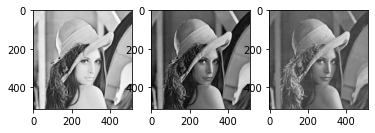

In [8]:
plt.subplot(131).imshow(R_img, cmap = "gray")
plt.subplot(132).imshow(G_img, cmap = "gray")
plt.subplot(133).imshow(B_img, cmap = "gray")
plt.show()

Or we can use syntax hconcat(); it is similar to montage(I) in Matlab.  
あるいは、hconcat() という構文も使えます。これは、Matlab の montage(I) に似ています。

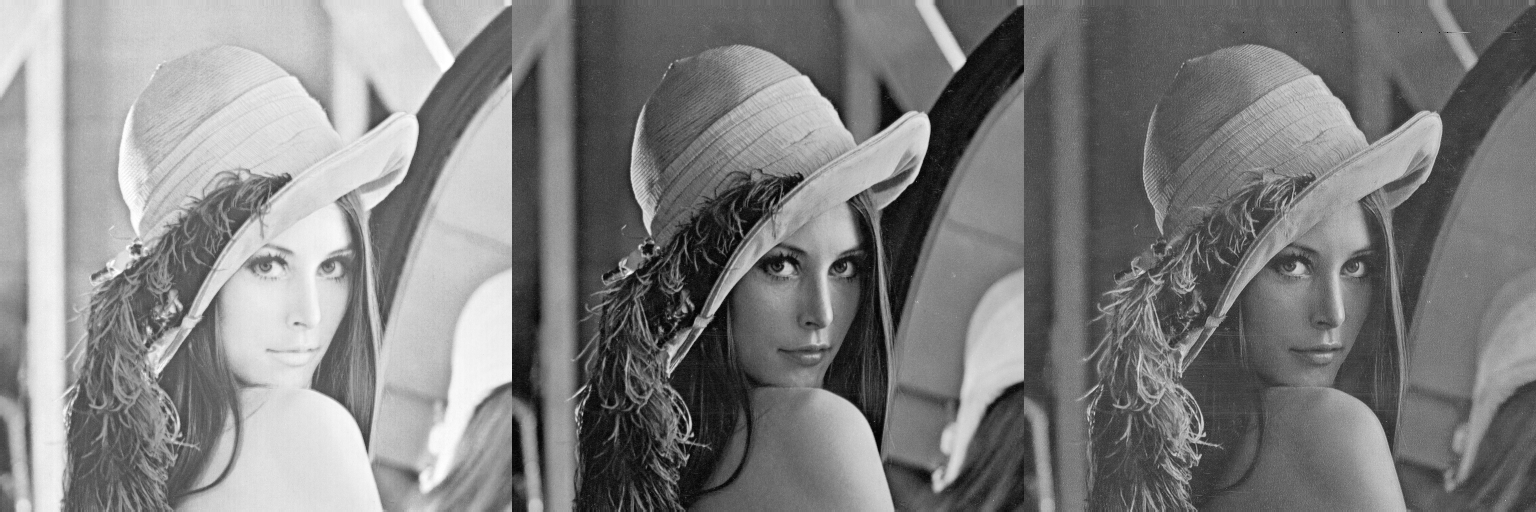

In [9]:
subplot_show = cv2.hconcat([R_img, G_img, B_img])
cv2_imshow(subplot_show)
print('\n')

If you just want to compare an image and a modified version of that image.
You can display two images together by control the cv2.hconcat().  
ある画像と，その画像を加工したものを比較したいだけならば，cv2.hconcat() を利用することができます。
cv2.hconcat() を制御することで，2つの画像を一緒に表示することができます。

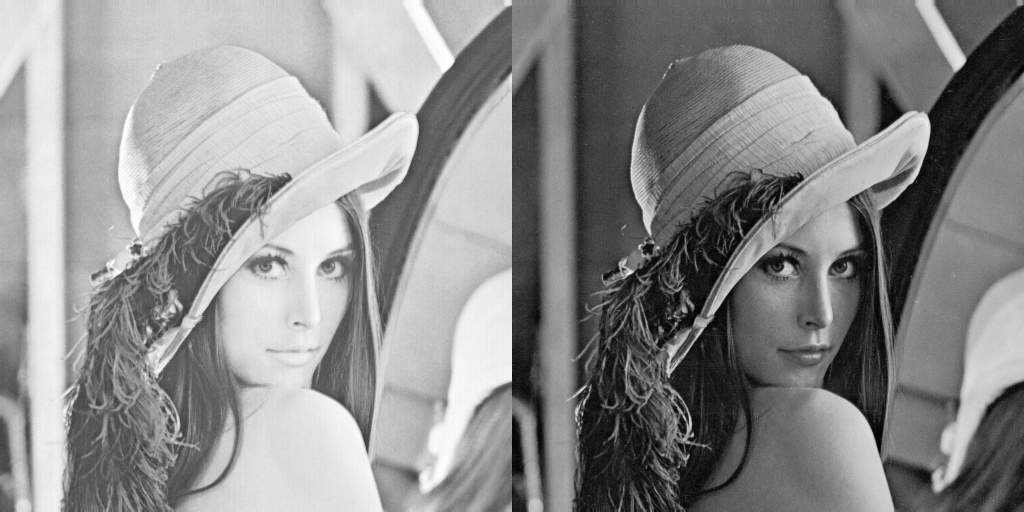

In [10]:
subplot_show = cv2.hconcat([R_img, G_img])
cv2_imshow(subplot_show)
print('\n')

Most images use the unsigned 8-bit integer (uint8) data type, which stores integers from 0 to 255. Bright or brightly colored images contain pixel intensity values near 255 in one or more color planes.
You find the largest value in an array using the max function. and the smallest value in an array using the min function.  
ほとんどの画像は符号なし8ビット整数（uint8）データ型を使用しており、0から255までの整数を格納することができます。明るい画像や鮮やかな色の画像は、1つまたは複数の色平面で255に近い画素強度の値を含んでいます。
配列の最大値は max 関数で、最小値は min 関数で求めます。

In [11]:
Rmax = np.max(R_img)
print(Rmax,'\n')
Rmin = np.min(R_img)
print(Rmin,'\n')

255 

54 



Many common tasks can be completed more quickly using functions in opencv. For example, if you want to extract all three color planes of an image array, you can use cv2.split instead of indexing into each plane individually.  
opencv の関数を利用することで，より高速に画像処理することができます。例えば，画像配列の 3 つの色面をすべて抽出したい場合，各色面を個別にインデックス化する代わりに， cv2.split を利用することができます。

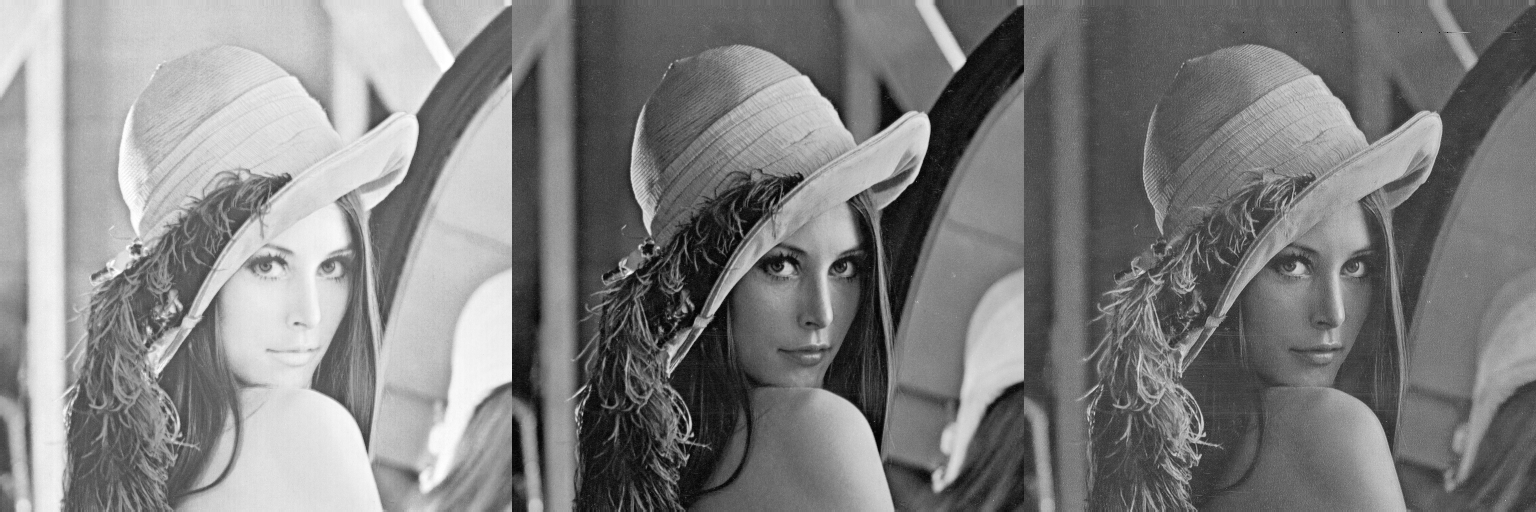

In [12]:
B_img,G_img,R_img = cv2.split(I_cv)
subplot_show = cv2.hconcat([R_img, G_img, B_img])
cv2_imshow(subplot_show)
print('\n')

Convert RGB to grayscale (check the reasons below)


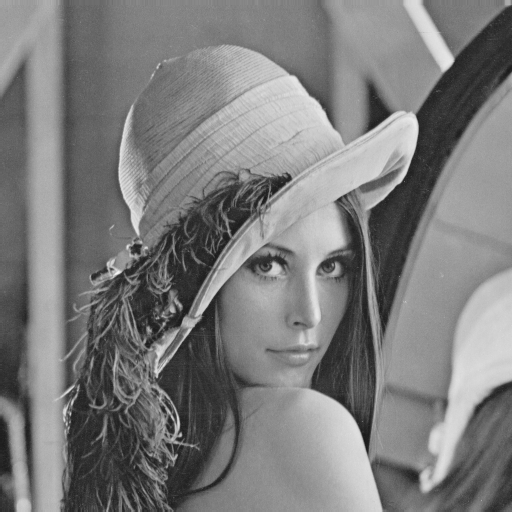

(512, 512)


In [13]:
gs_img = cv2.cvtColor(I_cv, cv2.COLOR_BGR2GRAY)
cv2_imshow(gs_img)
sz=gs_img.shape
print(sz)



If you are analyzing a set of images, normalizing the brightness can be an important preprocessing step. 
An intensity histogram separates pixels into bins based on their intensity values. Dark images, for example, have many pixels binned in the low end of the histogram. Bright regions have pixels binned at the high end of the histogram.
Lets assume that we have two grayscale image R_img(brighter) and G_img(darker).  
画像を分析する場合、明るさを正規化することは重要な前処理が必要となります。
強度ヒストグラムは、強度値に基づいてピクセルをビンに分離します。例えば、暗い画像では、多くのピクセルがヒストグラムの低域にビン詰めされています。明るい領域は、ヒストグラムの高位にビニングされたピクセルを持ちます。
2つのグレースケール画像R_img（明るい）とG_img（暗い）があると仮定しますと以下になります。

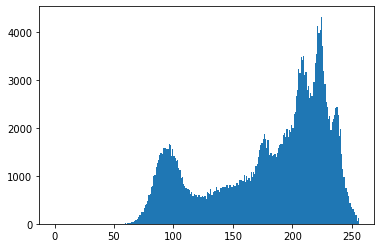

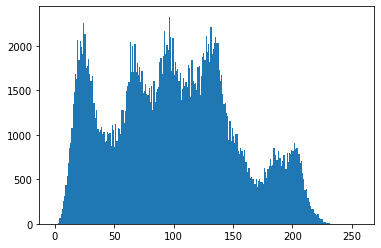

In [14]:
plt.hist(R_img.ravel(),bins = 256, range = [0,256]) 
plt.show()
plt.hist(G_img.ravel(),bins = 256, range = [0,256]) 
plt.show()



Increasing image contrast brightens brighter pixels and darkens darker pixels. You can use the exposure.rescale_intensity to adjust the contrast of a grayscale image automatically.  
画像のコントラストを上げると、明るい画素は明るくなり、暗い画素は暗くなる。exposure.rescale_intensityを使えば、グレースケール画像のコントラストを自動的に調整することができます。

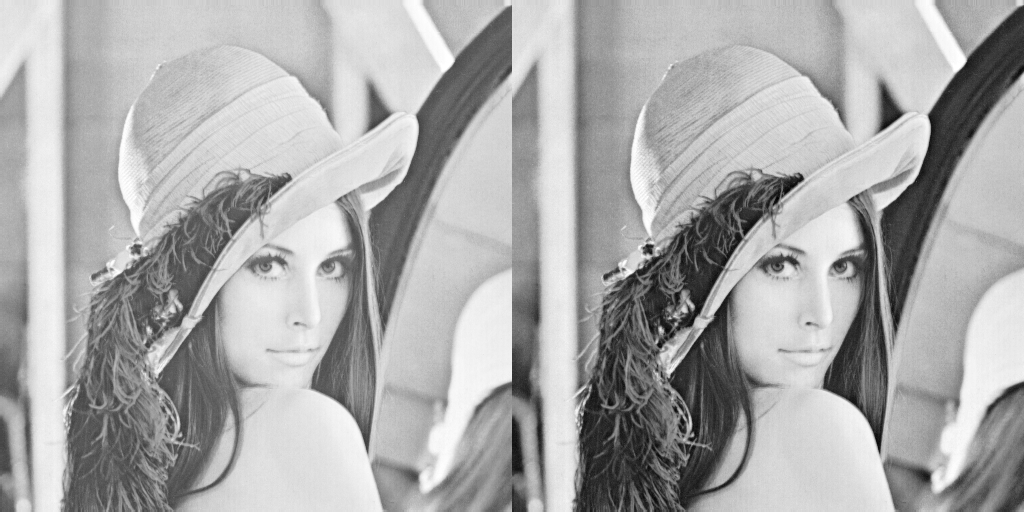

In [15]:
from skimage import exposure
R_img_Adj = exposure.rescale_intensity(R_img);
subplot_show = cv2.hconcat([R_img, R_img_Adj])
cv2_imshow(subplot_show)
print('\n')

similar for RGB images

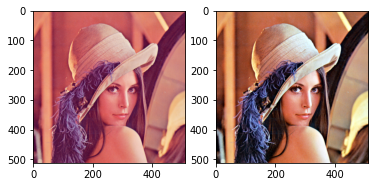

In [16]:
p1, p99 = np.percentile(R_img, (1, 99))
R_img_Adj = exposure.rescale_intensity(R_img, in_range=(p1, p99))
p1, p99 = np.percentile(G_img, (1, 99))
G_img_Adj = exposure.rescale_intensity(G_img, in_range=(p1, p99))
p1, p99 = np.percentile(B_img, (1, 99))
B_img_Adj = exposure.rescale_intensity(B_img, in_range=(p1, p99))
I_Adj = np.dstack((R_img_Adj, G_img_Adj,B_img_Adj))

plt.subplot(121).imshow(I)
plt.subplot(122).imshow(I_Adj)
plt.show()
print('\n')